Evalvuate the eror 
The objective of the eval pred is to first figure out some info about the evaluation metric. The evaluation metric Consists of two parts. Ftist is a rank based one. We rank the customers that have defulted based on the predicted probability. choose the highest .04(#1 + #0*20). 

This is equvalent to the recall level of 4% the doc states. That is, of all the customers that are going to deafult, we aim to recall at least 96% of them!! 


# Q:
 - What does a recall of 4% mean? How do we train for a recall of a 4%? 

In [1]:
import torch 
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

from pd.nn.conv import Conv
from pd.data.loader import CustomerData
from pd.nn.train_utils import train_torch_model
from pd.metric import amex_metric
from pd.params import *


In [2]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from bes.nn.es_module import ESModule


In [7]:
def top_four_percent_captured(df) -> float:
        """Corresponds to the recall for a threshold of 4 %"""
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
    

In [10]:
train_data = np.load(OUTDIR+"train13_raw_all_data.npy")
train_labels = np.load(OUTDIR+"train13_raw_all_labels.npy")

In [9]:


test_data = np.load(OUTDIR+"train_raw_all_data.npy", mmap_mode="r+")
train_labels = np.load(OUTDIR+"train_raw_all_labels.npy")
class Data(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):        
        return torch.from_numpy(self.data[index]), index

train_dataset = Data(test_data, )
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)


In [19]:
model_name = "conv13_32_all"
model = Conv(conv_channels=32)
model_param = torch.load(OUTDIR+model_name)
model.load_state_dict(model_param)

<All keys matched successfully>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=1/9, random_state=1, shuffle=True)
validation_data = (X_test, y_test)


In [16]:
X_test, y_test = validation_data
val_features = torch.from_numpy(X_test)
val_pred = model(val_features)
val_metrix, val_gini, val_recall = amex_metric(y_test, val_pred.detach().numpy(), return_components=True)


In [17]:
val_metrix, val_gini, val_recall

(0.8106466362523513, 0.9281171813848559, 0.6931760911198468)

In [13]:
val_metrix, val_gini, val_recall

(0.8076595984542532, 0.9279778102472538, 0.6873413866612527)

In [9]:
preds = np.load(OUTDIR+"c13_preds.npy")

In [ ]:
a, b, c = amex_metric(train_labels, preds, return_components=True)

In [13]:
preds = np.zeros(len(train_dataset))
model.eval()
for idx, (feat, indices) in enumerate(train_loader):
        batch_pred = model(feat)
        preds[indices.numpy()] = batch_pred.detach().numpy().reshape(-1, )
        #preds.append(batch_pred)
        print(amex_metric(train_labels[indices.numpy()], preds[indices.numpy()], return_components=True))

(0.9189522846823319, 0.6626991745056633, 0.7908257295939976)
(0.9117926612179975, 0.6322059953881629, 0.7719993283030802)
(0.9137001253827733, 0.630639278172394, 0.7721697017775837)
(0.910439040794739, 0.6391986391986392, 0.7748188399966891)
(0.9143557163604561, 0.6452611218568666, 0.7798084191086614)
(0.9117057372875503, 0.6510107015457788, 0.7813582194166646)
(0.907421621330389, 0.6261520737327189, 0.7667868475315539)
(0.9117512332341383, 0.6370797310278579, 0.7744154821309981)
(0.9146816478243461, 0.6332438650306749, 0.7739627564275104)
(0.911634259072624, 0.6298299845440495, 0.7707321218083367)
(0.9122821673600039, 0.6259376233714963, 0.76910989536575)
(0.9091516211022168, 0.630766223612197, 0.769958922357207)
(0.9177579459881187, 0.6546998648909477, 0.7862289054395332)
(0.9128007189670488, 0.6530612244897959, 0.7829309717284223)
(0.9095910951030811, 0.6390001908032819, 0.7742956429531815)
(0.9122655531659488, 0.6271450858034321, 0.7697053194846905)
(0.9123261570727688, 0.645030032

(0.47234747244543596, 0.09336767546683837, 0.28285757395613714)

In [25]:
%load_ext memory_profiler


In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=1/9, random_state=0, shuffle=True)
validation_data = (X_test, y_test)

train_dataset = CustomerData(X_train, train_labels=y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)


In [14]:
model_name = "conv_all_13"

model = Conv(input_dim=X_train.shape[-1], conv_channels=25)
model = train_torch_model(model, train_loader, num_epochs=50, validation_data=validation_data, 
                        output_model_name=model_name)
 

0, BCE loss: 0.746, amex train: 0.033, val 0.000
0, BCE loss: 0.880, amex train: 0.146, val 0.000
0, BCE loss: 0.725, amex train: 0.220, val 0.000
0, BCE loss: 0.568, amex train: 0.288, val 0.000
0, BCE loss: 0.526, amex train: 0.314, val 0.000
0, BCE loss: 0.582, amex train: 0.345, val 0.000
0, BCE loss: 0.607, amex train: 0.355, val 0.000
0, BCE loss: 0.571, amex train: 0.358, val 0.000
0, BCE loss: 0.529, amex train: 0.384, val 0.000
0, BCE loss: 0.511, amex train: 0.386, val 0.000
0, BCE loss: 0.519, amex train: 0.391, val 0.000
0, BCE loss: 0.531, amex train: 0.378, val 0.000
0, BCE loss: 0.546, amex train: 0.387, val 0.000
0, BCE loss: 0.537, amex train: 0.388, val 0.000
0, BCE loss: 0.542, amex train: 0.388, val 0.000
0, BCE loss: 0.529, amex train: 0.396, val 0.000
0, BCE loss: 0.520, amex train: 0.399, val 0.000
0, BCE loss: 0.494, amex train: 0.387, val 0.000
1, BCE loss: 0.507, amex train: 0.408, val 0.000
1, BCE loss: 0.503, amex train: 0.387, val 0.000
1, BCE loss: 0.511, 

: 

: 

(343141, 13, 188)

# D analysis of GBM

In [18]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from pd.params import *



In [45]:
df.sort_values(by="catb_agg2", ascending=False, inplace=True)
df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
df['weight_cumsum'] = df['weight'].cumsum()
four_pct_cutoff = int(0.04 * df['weight'].sum())
df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        

<AxesSubplot:ylabel='Frequency'>

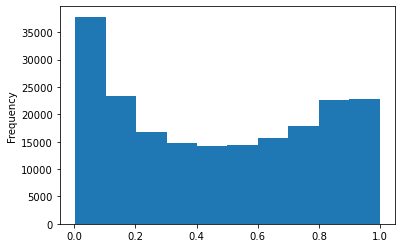

In [107]:
df[df["std"]>0.01].catb_agg2.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

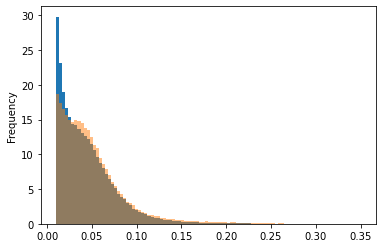

In [104]:
df[df.target==0]["std"].plot(kind="hist", bins=100, density=True, range=[0.01, 0.35])
df[df.target==1]["std"].plot(kind="hist", bins=100, density=True, alpha=0.5, range=[0.01, 0.35])

In [47]:
df_cutoff[["target", "T"]].value_counts()

target  T
1       1    59628
        0    18693
0       1     7358
        0     2567
dtype: int64

<AxesSubplot:ylabel='Frequency'>

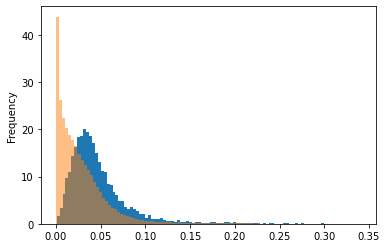

In [48]:
df_cutoff[df_cutoff.target==0]["std"].plot(kind="hist", bins=100, density=True)
df_cutoff[df_cutoff.target==1]["std"].plot(kind="hist", bins=100, density=True, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

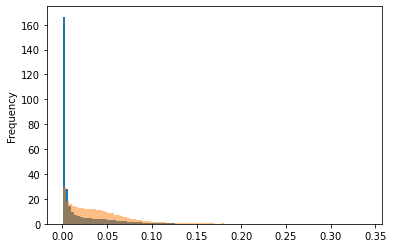

In [51]:
df[df.target==0]["std"].plot(kind="hist", bins=100, density=True)
df[df.target==1]["std"]

In [25]:
four_pct_cutoff

240823

In [108]:
df13 = df[df.index.isin(c13)]
df13.sort_values(by="catb_agg2", ascending=False, inplace=True)
df13['weight'] = df13['target'].apply(lambda x: 20 if x==0 else 1)
df13['weight_cumsum'] = df13['weight'].cumsum()
four_pct_cutoff = int(0.04 * df13['weight'].sum())
four_pct_cutoff = 276821
df_cutoff13 = df13.loc[df13['weight_cumsum'] <= four_pct_cutoff]


/var/folders/t2/_nykd9tn43dfx142nv5r8l900000gn/T/ipykernel_35441/2102234973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13.sort_values(by="catb_agg2", ascending=False, inplace=True)
/var/folders/t2/_nykd9tn43dfx142nv5r8l900000gn/T/ipykernel_35441/2102234973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['weight'] = df13['target'].apply(lambda x: 20 if x==0 else 1)
/var/folders/t2/_nykd9tn43dfx142nv5r8l900000gn/T/ipykernel_35441/2102234973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [95]:
df_cutoff13[["target", "T"]].value_counts()

target  T
1       1    65774
0       1    10552
dtype: int64

In [111]:
(df_cutoff13['target'] == 1).sum() / (df13['target'] == 1).sum()

0.7350857193947116

In [113]:
(df['target'] == 1).sum()

118828

In [ ]:
import plotly.express as px
fig = px.line(a, x="feature", y=['gbm_recall', 'gbm_gini'], hue="target")
fig.show()

# Error Analysis of the C13 

In [49]:
train_data = np.load(OUTDIR+"train13_raw_all_data.npy")
train_labels = np.load(OUTDIR+"train13_raw_all_labels.npy")

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=1/9, random_state=0, shuffle=True)
validation_data = (X_test, y_test)

In [53]:
import joblib
import lightgbm as lgb 

model = joblib.load(OUTDIR+f'lgbm13.pkl')

In [56]:
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
amex_metric(y_test, y_pred, return_components=True)

(0.9323274209347154, 0.6966805400466958, 0.8145039804907056)

In [67]:
y_pred.shape 

(50991,)

In [68]:
import json 
with open(OUTDIR+'train_agg1_mean_q5_q95_q5_q95_id.json', 'r') as f:
            train_id_dict = json.load(f)

In [83]:
train_customers_count = pd.read_parquet(TRAINDATA).customer_ID.value_counts().to_dict()


In [ ]:
train_id_dict1 = {val:key for key, val in train_id_dict.items()}

# EA for Ensemble
 - get the indices of the c13 and other 
 - split data into the train- val for the 13 and the rest 
 - investigate how use other probs in combination with the C13

In [3]:
from pd.utils import get_customers_data_indices, get_customers_id_from_indices


In [42]:
df = pd.read_csv(os.path.join(PREDDIR, "train_pred.csv"), index_col=0)


In [43]:
cols = df.columns[1:]

In [44]:
data = df
data["std"] = data[cols].apply(np.std, axis=1)
from scipy.stats import kurtosis, skew
data["skew"] = data[cols].apply(skew, axis=1)
data["k"] = data[cols].apply(kurtosis, axis=1)
data["T"] = 0 
data["T"][data.index.isin(c13)] = 1

/var/folders/t2/_nykd9tn43dfx142nv5r8l900000gn/T/ipykernel_35441/2609896768.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["T"][data.index.isin(c13)] = 1


In [6]:
c13_indices, other_indices = get_customers_data_indices(num_data_points=[13], id_dir=f'train_agg{1}_mean_q5_q95_q5_q95_id.json')
c13 = get_customers_id_from_indices(c13_indices, id_dir=f'train_agg{1}_mean_q5_q95_q5_q95_id.json')
co = get_customers_id_from_indices(other_indices, id_dir=f'train_agg{1}_mean_q5_q95_q5_q95_id.json')

In [7]:
for col in df.columns[1:]:
    print(col, amex_metric(df.target.values.reshape(-1), df[col].values.reshape(-1), return_components=True))

xgbm13_p0_agg4 (0.7784211269909311, 0.9153520328218663, 0.641490221159996)
catb13_agg4 (0.7800931240548388, 0.9163817575855585, 0.6438044905241189)
xgbm_p0_agg4 (0.7835301255381706, 0.9182148611009147, 0.6488453899754266)
catb_agg4 (0.7852057909753889, 0.9193781554856348, 0.651033426465143)
xgbm13_p0_agg1 (0.7803124979124139, 0.9143547564872979, 0.6462702393375299)
catb13_agg1 (0.7827671015956867, 0.9159903246442297, 0.6495438785471438)
xgbm_p0_agg1 (0.7884289087744241, 0.9211706057805782, 0.65568721176827)
catb_agg1 (0.791248008817272, 0.9222475913377114, 0.6602484262968324)
xgbm13_p0_agg2 (0.780711393613778, 0.9150515615905006, 0.6463712256370553)
catb13_agg2 (0.7843004509212151, 0.9173486717283158, 0.6512522301141145)
xgbm_p0_agg2 (0.7867236616624773, 0.9202342758950559, 0.6532130474298987)
catb_agg2 (0.7905246330788464, 0.9219369357305206, 0.6591123304271721)
xgbm13_p0_agg0 (0.7783887239555718, 0.9151778249266618, 0.6415996229844818)
catb13_agg0 (0.7805501417581232, 0.9169844185685

In [8]:
for col in df.columns[1:]:
    print(col, amex_metric(df.target.loc[c13].values.reshape(-1), df[col].loc[c13].values.reshape(-1), return_components=True))

xgbm13_p0_agg4 (0.8099400212050867, 0.9286486782759729, 0.6912313641342006)
catb13_agg4 (0.811614787785892, 0.9294948027784717, 0.6937347727933123)
xgbm_p0_agg4 (0.8109237251895436, 0.9289620483808305, 0.6928854019982565)
catb_agg4 (0.812617863215303, 0.929925147293835, 0.6953105791367711)
xgbm13_p0_agg1 (0.8144925403188599, 0.9309922779376146, 0.6979928027001051)
catb13_agg1 (0.8165566971642686, 0.9318683955578897, 0.7012449987706475)
xgbm_p0_agg1 (0.815346150057431, 0.931168394797354, 0.6995239053175082)
catb_agg1 (0.817512726248375, 0.9320370084099355, 0.7029884440868146)
xgbm13_p0_agg2 (0.8138339129117962, 0.9306138013706542, 0.6970540244529382)
catb13_agg2 (0.8167983710384117, 0.9318376504565369, 0.7017590916202866)
xgbm_p0_agg2 (0.8140811043825364, 0.9306723229830931, 0.6974898857819799)
catb_agg2 (0.8176582950477491, 0.9321493311044612, 0.7031672589910369)
xgbm13_p0_agg0 (0.8093626268823155, 0.928466195672139, 0.690259058092492)
catb13_agg0 (0.8123447698506905, 0.929725414441540

/var/folders/t2/_nykd9tn43dfx142nv5r8l900000gn/T/ipykernel_35441/2943485414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["T"][data.index.isin(c13)] = 1


In [15]:
df[df.T == 1]

,target,xgbm13_p0_agg4,catb13_agg4,xgbm_p0_agg4,catb_agg4,xgbm13_p0_agg1,catb13_agg1,xgbm_p0_agg1,catb_agg1,xgbm13_p0_agg2,catb13_agg2,xgbm_p0_agg2,catb_agg2,xgbm13_p0_agg0,catb13_agg0,xgbm_p0_agg0,catb_agg0,std,T
customer_ID,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,0.001161,0.000529,0.000842,0.000445,0.001045,0.000503,0.000937,0.000387,0.000908,0.000339,0.000722,0.000284,0.000581,0.000383,0.001079,0.000288,0.000271,1
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0,0.001499,0.000868,0.001189,0.000648,0.001601,0.001390,0.001547,0.001215,0.001622,0.001291,0.001988,0.001020,0.001584,0.001289,0.001231,0.001021,0.000328,1
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0,0.001104,0.001431,0.001254,0.001210,0.001626,0.001561,0.001255,0.001549,0.001448,0.001715,0.001964,0.001678,0.001656,0.001812,0.002137,0.001791,0.000254,1
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0,0.018017,0.009783,0.016114,0.009630,0.012393,0.005425,0.015091,0.007225,0.011902,0.004740,0.013395,0.005169,0.019506,0.006965,0.020323,0.008674,0.004859,1
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0,0.002971,0.003396,0.002746,0.003013,0.001842,0.003420,0.001918,0.002653,0.002224,0.002743,0.001949,0.002893,0.003799,0.004677,0.003453,0.004487,0.000844,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,0,0.002730,0.004286,0.002113,0.003219,0.003145,0.003823,0.003080,0.005093,0.002441,0.003406,0.004083,0.004420,0.003302,0.005103,0.002280,0.004329,0.000912,1
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0,0.030506,0.028569,0.020954,0.026186,0.016143,0.023527,0.015302,0.021109,0.022114,0.030508,0.022794,0.018536,0.024972,0.025614,0.024308,0.022978,0.004041,1
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0,0.001327,0.001241,0.002094,0.001248,0.002010,0.001161,0.002095,0.001167,0.002004,0.000904,0.001793,0.000991,0.001388,0.000895,0.001551,0.000821,0.000450,1


In [72]:
amex_metric(df.target.values.reshape(-1), df[cols].quantile(.69, axis=1).values.reshape(-1), return_components=True)

(0.7901923302956906, 0.9217940927117568, 0.6585905678796243)

In [118]:
len(c13)/df.shape[0]

0.8411921213824842

In [116]:
amex_metric(df.loc[c13].target.values.reshape(-1), df.loc[c13].xgbm_p0_agg1.values.reshape(-1), return_components=True)

(0.815346149869002, 0.9311683944204957, 0.6995239053175082)

In [125]:
df["mp"] = 0
df["mp"].loc[c13]= df.loc[c13].xgbm13_p0_agg1.values.reshape(-1)
df["mp"].loc[co] = df.loc[co].catb_agg0.values.reshape(-1)

c:\Users\20204069\Anaconda3\envs\p8\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [126]:
amex_metric(df.target.values.reshape(-1), df.mp.values.reshape(-1), return_components=True)

(0.7869155426505532, 0.9202730013478294, 0.653558083953277)

In [99]:
pred_file

,target,xgbm13_p0_agg4,catb13_agg4,xgbm_p0_agg4,catb_agg4,xgbm13_p0_agg1,catb13_agg1,xgbm_p0_agg1
customer_ID,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,0.001161,0.000529,0.000842,0.000445,0.001045,0.000503,NaN
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0,0.001499,0.000868,0.001189,0.000648,0.001601,0.001390,NaN
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0,0.001104,0.001431,0.001254,0.001210,0.001626,0.001561,NaN
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0,0.018017,0.009783,0.016114,0.009630,0.012393,0.005425,NaN
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0,0.002971,0.003396,0.002746,0.003013,0.001842,0.003420,NaN
...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,0,0.002730,0.004286,0.002113,0.003219,0.003145,0.003823,NaN
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0,0.030506,0.028569,0.020954,0.026186,0.016143,0.023527,NaN
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0,0.001327,0.001241,0.002094,0.001248,0.002010,0.001161,NaN


In [ ]:
amex_metric(train_labels[indices.numpy()], preds[indices.numpy()], return_components=True)

In [ ]:
df.sort_values(by="pred", ascending=False, inplace=True)
df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
df['weight_cumsum'] = df['weight'].cumsum()
#df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        

In [88]:
    pred_dir = os.path.join(DATADIR, "PRED", "train_pred.csv")
    pred_file = pd.read_csv(pred_dir, index_col=0)
    

In [86]:
def mp(row):
    if row["std"]>0.15:
        if row["T"]==0:
            return row[cols].min()
        else:
            row[cols].quantile(.4)
    else:
        row[cols].quantile(.69)  


In [87]:
df["mp"] = df.apply(mp, axis=1)

In [88]:
amex_metric(df.target.values.reshape(-1), df.mp.values.reshape(-1), return_components=True)

(0.7839254903340569, 0.917945234547671, 0.6499057461204429)